# EMPLOYEE RECORDS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm  
from scipy.stats import chi2_contingency

### Reading Data from csv File

In [4]:
import pandas as pd

edata = pd.read_csv("C://Users//deepi/Downloads/EmployeeRecords.csv")     
edata

,Unnamed: 0,employee_id,first_name,last_name,email,hire_date,salary,job_title,min_salary,max_salary,department_name,manager_name,street_address,postal_code,city,state_province,country_name,region_name
0,0,206,William,Gietz,WGIETZ,07-06-1994,8300,Public Accountant,4200,9000,Accounting,Shelley,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
1,1,205,Shelley,Higgins,SHIGGINS,07-06-1994,12000,Accounting Manager,8200,16000,Accounting,Neena,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
2,2,200,Jennifer,Whalen,JWHALEN,17-09-1987,4400,Administration Assistant,3000,6000,Administration,Neena,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
3,3,100,Steven,King,SKING,17-06-1987,24000,President,20000,40000,Executive,NaN,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
4,4,101,Neena,Kochhar,NKOCHHAR,21-09-1989,17000,Administration Vice President,15000,30000,Executive,Steven,2004 Charade Rd,98199,Seattle,Washington,United States of America,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,120,Matthew,Weiss,MWEISS,18-07-1996,8000,Stock Manager,5500,8500,Shipping,Steven,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas
103,103,121,Adam,Fripp,AFRIPP,10-04-1997,8200,Stock Manager,5500,8500,Shipping,Steven,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas
104,104,122,Payam,Kaufling,PKAUFLIN,01-05-1995,7900,Stock Manager,5500,8500,Shipping,Steven,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas
105,105,123,Shanta,Vollman,SVOLLMAN,10-10-1997,6500,Stock Manager,5500,8500,Shipping,Steven,2011 Interiors Blvd,99236,South San Francisco,California,United States of America,Americas


In [6]:
edata.describe()

,Unnamed: 0,employee_id,salary,min_salary,max_salary
count,107.000000,107.000000,107.000000,107.000000,107.000000
mean,53.000000,153.000000,6461.682243,4711.214953,9724.299065
std,31.032241,31.032241,3909.365746,3023.721533,5726.153853
min,0.000000,100.000000,2100.000000,2000.000000,5000.000000
25%,26.500000,126.500000,3100.000000,2500.000000,5500.000000
50%,53.000000,153.000000,6200.000000,4200.000000,9000.000000
75%,79.500000,179.500000,8900.000000,6000.000000,12000.000000
max,106.000000,206.000000,24000.000000,20000.000000,40000.000000


In [3]:
edata.shape

(107, 18)

### To Check the null values

In [4]:
# Check for missing values in each column
print(edata.isnull().sum())


Unnamed: 0         0
employee_id        0
first_name         0
last_name          0
email              0
hire_date          0
salary             0
job_title          0
min_salary         0
max_salary         0
department_name    1
manager_name       1
street_address     1
postal_code        2
city               1
state_province     2
country_name       1
region_name        1
dtype: int64


### To Drop the column

In [5]:
# edata = edata.drop(['commission_pct', 'prev_employment_start_date', 'prev_employment_end_date'], axis=1)

# edata = edata.drop('phone_number',axis = 1)

### Column Names To Upper case

In [6]:
columns_to_upper = ['employee_id', 'first_name', 'last_name', 'email', 'phone_number',
                    'hire_date', 'salary', 'job_title', 'min_salary', 'max_salary',
                    'department_name', 'manager_name', 'street_address',
                    'postal_code', 'city', 'state_province', 'country_name', 'region_name']

# Check if columns exist and are of string type before applying upper()
for col in columns_to_upper:
    if col in edata.columns and edata[col].dtype == object:
        edata[col] = edata[col].str.upper()


In [7]:
edata

,Unnamed: 0,employee_id,first_name,last_name,email,hire_date,salary,job_title,min_salary,max_salary,department_name,manager_name,street_address,postal_code,city,state_province,country_name,region_name
0,0,206,WILLIAM,GIETZ,WGIETZ,07-06-1994,8300,PUBLIC ACCOUNTANT,4200,9000,ACCOUNTING,SHELLEY,2004 CHARADE RD,98199,SEATTLE,WASHINGTON,UNITED STATES OF AMERICA,AMERICAS
1,1,205,SHELLEY,HIGGINS,SHIGGINS,07-06-1994,12000,ACCOUNTING MANAGER,8200,16000,ACCOUNTING,NEENA,2004 CHARADE RD,98199,SEATTLE,WASHINGTON,UNITED STATES OF AMERICA,AMERICAS
2,2,200,JENNIFER,WHALEN,JWHALEN,17-09-1987,4400,ADMINISTRATION ASSISTANT,3000,6000,ADMINISTRATION,NEENA,2004 CHARADE RD,98199,SEATTLE,WASHINGTON,UNITED STATES OF AMERICA,AMERICAS
3,3,100,STEVEN,KING,SKING,17-06-1987,24000,PRESIDENT,20000,40000,EXECUTIVE,NaN,2004 CHARADE RD,98199,SEATTLE,WASHINGTON,UNITED STATES OF AMERICA,AMERICAS
4,4,101,NEENA,KOCHHAR,NKOCHHAR,21-09-1989,17000,ADMINISTRATION VICE PRESIDENT,15000,30000,EXECUTIVE,STEVEN,2004 CHARADE RD,98199,SEATTLE,WASHINGTON,UNITED STATES OF AMERICA,AMERICAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,102,120,MATTHEW,WEISS,MWEISS,18-07-1996,8000,STOCK MANAGER,5500,8500,SHIPPING,STEVEN,2011 INTERIORS BLVD,99236,SOUTH SAN FRANCISCO,CALIFORNIA,UNITED STATES OF AMERICA,AMERICAS
103,103,121,ADAM,FRIPP,AFRIPP,10-04-1997,8200,STOCK MANAGER,5500,8500,SHIPPING,STEVEN,2011 INTERIORS BLVD,99236,SOUTH SAN FRANCISCO,CALIFORNIA,UNITED STATES OF AMERICA,AMERICAS
104,104,122,PAYAM,KAUFLING,PKAUFLIN,01-05-1995,7900,STOCK MANAGER,5500,8500,SHIPPING,STEVEN,2011 INTERIORS BLVD,99236,SOUTH SAN FRANCISCO,CALIFORNIA,UNITED STATES OF AMERICA,AMERICAS
105,105,123,SHANTA,VOLLMAN,SVOLLMAN,10-10-1997,6500,STOCK MANAGER,5500,8500,SHIPPING,STEVEN,2011 INTERIORS BLVD,99236,SOUTH SAN FRANCISCO,CALIFORNIA,UNITED STATES OF AMERICA,AMERICAS


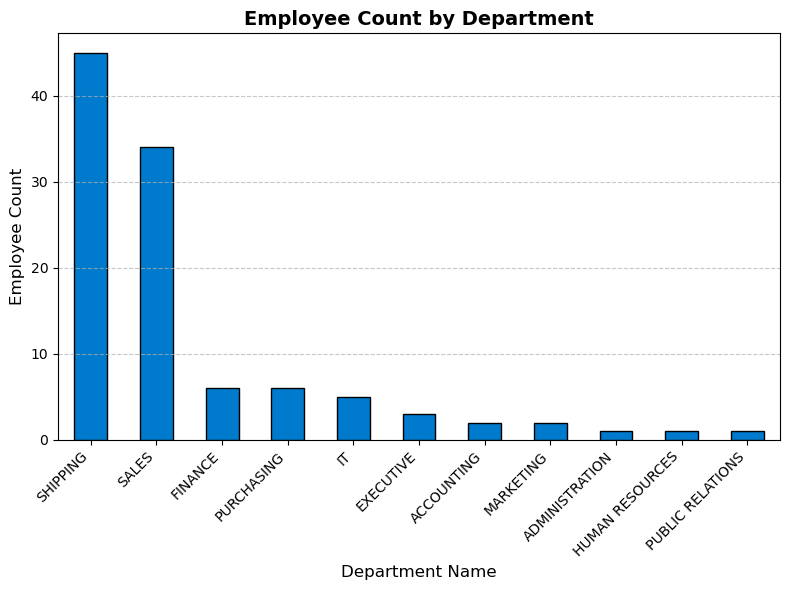

In [8]:
import matplotlib.pyplot as plt

# Plotting the bar chart with improved visualization
ax = edata['department_name'].value_counts().plot(kind='bar', color='#007acc', figsize=(8, 6), edgecolor='black')

# Adding title and labels
ax.set_title('Employee Count by Department', fontsize=14, fontweight='bold')
ax.set_xlabel('Department Name', fontsize=12)
ax.set_ylabel('Employee Count', fontsize=12)

# Rotating x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adding gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


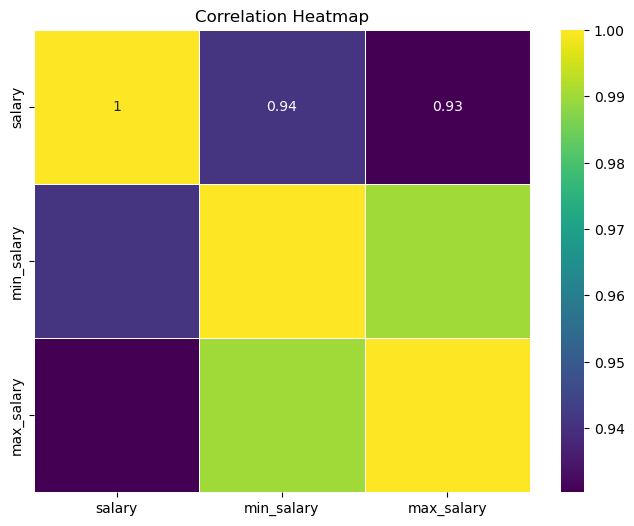

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numeric columns for correlation analysis
numeric_columns = ['salary', 'min_salary', 'max_salary']

# Compute the correlation matrix
correlation_matrix = edata[numeric_columns].corr()

# Create the heatmap with a different color palette (e.g., 'viridis')
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



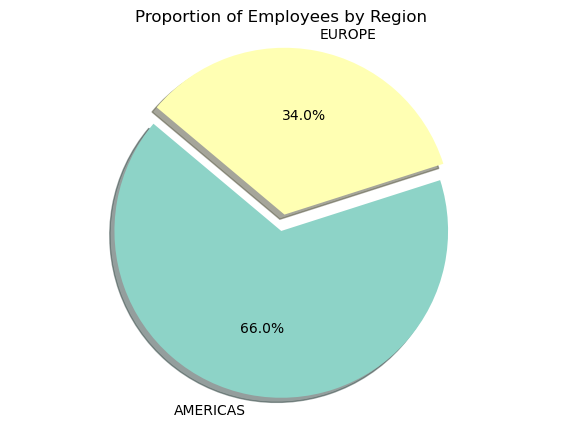

In [10]:
import matplotlib.pyplot as plt

# Group the data by region and count the number of employees in each region
department_counts = edata['region_name'].value_counts()

# Define a custom color palette (you can choose other palettes or define custom colors)
colors = plt.cm.Set3(range(len(department_counts)))

# Create the pie chart with custom colors, shadow, and exploded slices
plt.figure(figsize=(7, 5))
explode = [0.05] * len(department_counts)  # Slightly "explode" each slice for better emphasis
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=140,
        colors=colors, explode=explode, shadow=True)
plt.title('Proportion of Employees by Region')

# Ensure the pie chart is circular
plt.axis('equal')  

# Show the plot
plt.show()


In [12]:
edata["country_name"].unique()

array(['UNITED STATES OF AMERICA', 'UNITED KINGDOM', 'CANADA', 'GERMANY',
       nan], dtype=object)

In [15]:
columns_to_check = ["job_title","department_name",	
	"state_province","country_name","region_name"]

# Iterate over each column and print unique values
for column in columns_to_check:
    unique_values = edata[column].unique()
    print(f'Unique values in {column}: {unique_values}\n')

Unique values in job_title: ['PUBLIC ACCOUNTANT' 'ACCOUNTING MANAGER' 'ADMINISTRATION ASSISTANT'
 'PRESIDENT' 'ADMINISTRATION VICE PRESIDENT' 'ACCOUNTANT'
 'FINANCE MANAGER' 'HUMAN RESOURCES REPRESENTATIVE' 'PROGRAMMER'
 'MARKETING MANAGER' 'MARKETING REPRESENTATIVE'
 'PUBLIC RELATIONS REPRESENTATIVE' 'PURCHASING CLERK' 'PURCHASING MANAGER'
 'SALES MANAGER' 'SALES REPRESENTATIVE' 'SHIPPING CLERK' 'STOCK CLERK'
 'STOCK MANAGER']

Unique values in department_name: ['ACCOUNTING' 'ADMINISTRATION' 'EXECUTIVE' 'FINANCE' 'HUMAN RESOURCES'
 'IT' 'MARKETING' 'PUBLIC RELATIONS' 'PURCHASING' 'SALES' nan 'SHIPPING']

Unique values in state_province: ['WASHINGTON' nan 'TEXAS' 'ONTARIO' 'BAVARIA' 'OXFORD' 'CALIFORNIA']

Unique values in country_name: ['UNITED STATES OF AMERICA' 'UNITED KINGDOM' 'CANADA' 'GERMANY' nan]

Unique values in region_name: ['AMERICAS' 'EUROPE' nan]



In [2]:
from scipy.stats import ttest_1samp

In [7]:
hm = 6200

In [9]:
t_stat, p_value = ttest_1samp(edata["salary"],hm) # p value
alpha = 0.05

# interpret the result
print(f"t-statistics: {t_stat}") 
print(f"p_value: {p_value}")

if p_value < alpha:
    print(f"reject the null hypothesis at alpha = {alpha}") 

else:
    print(f"fail to reject the null hypothesis at alpha = {alpha}")


t-statistics: 0.6924044320436438
p_value: 0.49019745449529095
fail to reject the null hypothesis at alpha = 0.05


## Null Hypothesis (H₀): The mean salary of the employee is equal to $6,200
## Alternative Hypothesis (H₁): The mean salary of the employee is different


In [ ]:
# 0.49 is greater than 0.05

In [ ]:
# This means there isn't sufficient evidence to conclude that the mean salary of employee is different